lets use $f(x) = x^2$ as our example function
our domain shall be from $[0-8]$

The goal is to understand how different integration techniques work
  - midpoint rule
  - trapezoid
  - simpson rule

In [99]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

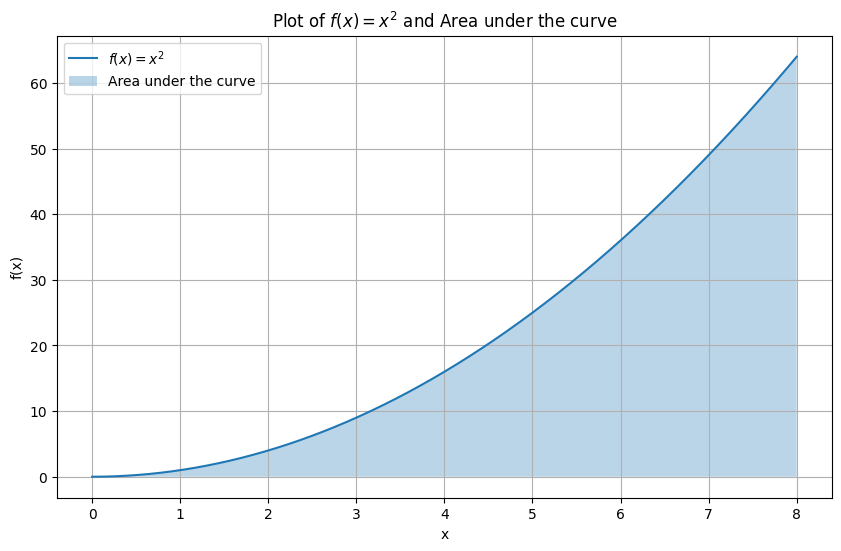

512/3

In [100]:
def exact_int(integral_result, resolution):
    # Define the variable and the function
    x = sp.Symbol('x')
    f = x**2

    # Create a numeric version of the function for plotting
    f_numeric = sp.lambdify(x, f, 'numpy')

    # Generate x values for plotting
    x_vals = np.linspace(0, 8, resolution)
    y_vals = f_numeric(x_vals)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='$f(x) = x^2$')

    # Shade the area under the curve for the integral
    x_fill = np.linspace(0, 8, 400)
    y_fill = f_numeric(x_fill)
    plt.fill_between(x_fill, y_fill, alpha=0.3, label='Area under the curve')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Plot of $f(x) = x^2$ and Area under the curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # print("The exact integral of x^2 from 0 to 8 is:", integral_result)
    return integral_result

integral_result = sp.integrate(f, (x, 0, 8))
exact_int(integral_result, 4000)


So we see that the exact value for the area under the curve is 512/3. Note that changing the resolution only affects the ability to shade the area under the curve more precisely (soley visual). The value for the soltuion does not change.

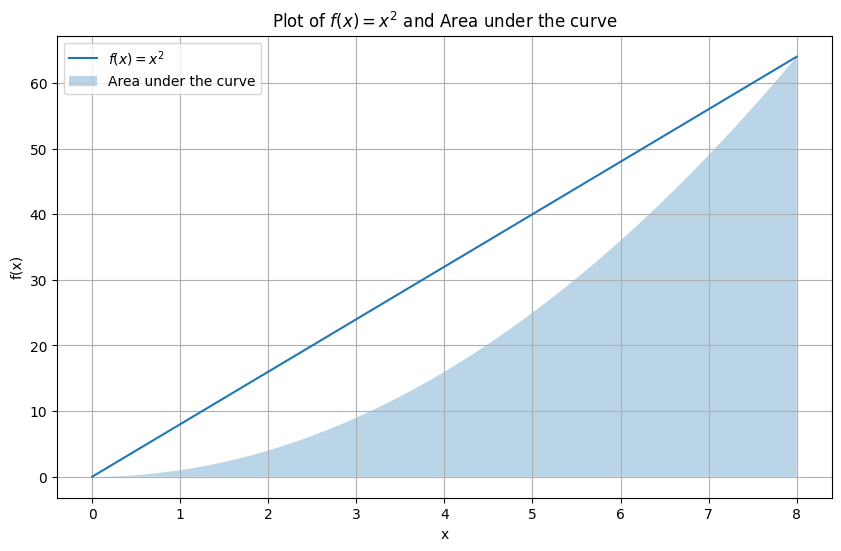

512/3

In [101]:
exact_int(integral_result, 2)

Now lets model the midpoint rule <br>
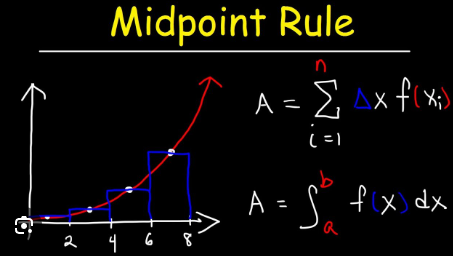

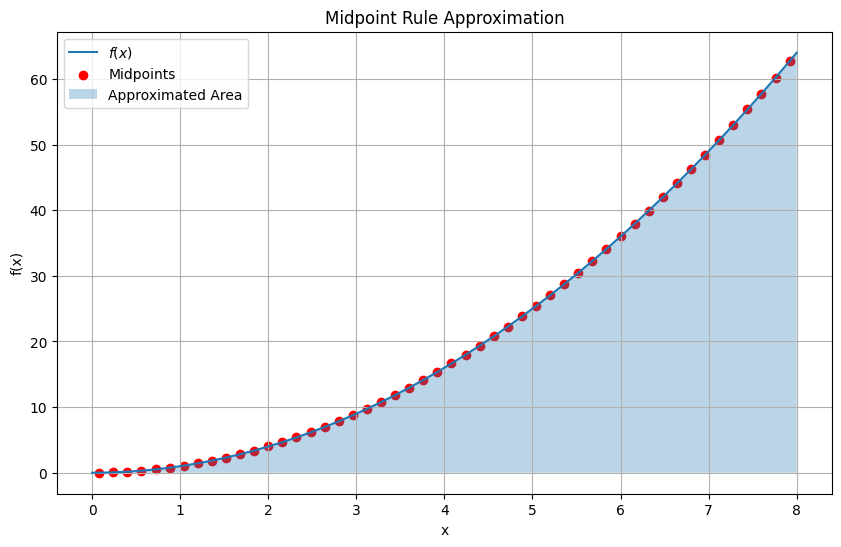

In [102]:
def midpoint_rule_integration(f, a, b, n, plot=False):
    # Define the variable
    x = sp.Symbol('x')
    
    # Calculate the width of each subinterval
    h = (b - a) / n

    # Calculate the midpoints of each subinterval
    midpoints = [a + (i + 0.5) * h for i in range(n)]

    # Calculate the sum of function values at midpoints
    approximation = h * sum([f.subs(x, midpoint) for midpoint in midpoints])

    if plot:
        # Create a numeric version of the function for plotting
        f_numeric = sp.lambdify(x, f, 'numpy')

        # Generate x values for plotting
        x_vals = np.linspace(a, b, 400)
        y_vals = f_numeric(x_vals)

        # Plot the function
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label='$f(x)$')

        # Plot the midpoints
        plt.scatter(midpoints, [f_numeric(midpoint) for midpoint in midpoints], color='red', label='Midpoints')

        # Shade the area under the curve for the approximation
        x_fill = np.linspace(a, b, 400)
        y_fill = f_numeric(x_fill)
        plt.fill_between(x_fill, y_fill, alpha=0.3, label='Approximated Area')

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Midpoint Rule Approximation')
        plt.legend()
        plt.grid(True)
        plt.show()

    # print("Approximated integral using Midpoint Rule:", approximation)
    return approximation

# Define the function to integrate and specify interval and subintervals
x = sp.Symbol('x')
f = x**2
a = 0
b = 8
n = 50

# Call the function with and without plotting
approximation = midpoint_rule_integration(f, a, b, n, plot=True)


In [97]:
midpoint_rule_integration(f, a, b, 2)

160.000000000000

Now we can start to see how the number of midpoints dictates how close we are to the exact answer. As we turn down the resolution we fade away from the truth

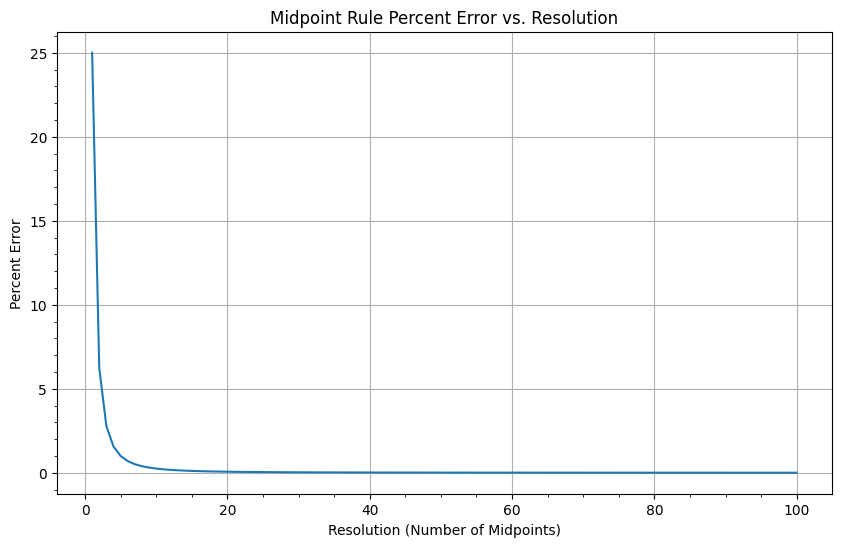

In [98]:
def graph_midpoint_error():

    # Define the function to integrate and specify interval and subintervals
    x = sp.Symbol('x')
    f = x**2
    a = 0
    b = 8
    # Calculate the definite integral
    integral_result = sp.integrate(f, (x, 0, 8))

    percent_errors = []
    resolutions = range(1, 101)
    for resolution in range(1, 101):
        # Call the function
        approximation = midpoint_rule_integration(f, a, b, resolution)
        percent_error = abs(integral_result - approximation) / integral_result * 100
        percent_errors.append(percent_error)

    plt.figure(figsize=(10, 6))
    plt.plot(resolutions, percent_errors)
    plt.xlabel('Resolution (Number of Midpoints)')
    plt.ylabel('Percent Error')
    plt.title('Midpoint Rule Percent Error vs. Resolution')
    plt.minorticks_on()
    plt.grid(True)
    plt.show()
    
graph_midpoint_error()
        

With this we can see that the percent error steeply drops off as the resolution (number of midpoints increase). We could fit a function to this to understand the error. 